Um Estudo sobre otimização evolucionária e extração de conhecimento de fronteiras de Pareto aplicado a um
amplificador operacional de transcondutância
===

Antonio Paulo de Moraes Leme

Orientador: Prof. Dr. Carlos Eduardo Thomaz

2012


In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [114]:
rng = np.random.RandomState(0)

In [115]:
leme_data = pd.read_csv("leme-fronteira.csv", delimiter="\t")

leme_data.head()

,N.,Semente,A_{v0},f_{T},SR,Pwr,Area,I_{pol},V_{pol},"W_{1,2}",...,"W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
0,1,1241,36.65300,0.872680,0.614295,0.004818,4.6197,0.15,0.70,1.64,...,0.50,0.56,1.33,0.50,0.50,0.50,0.61,0.50,0.55,0.52
1,2,1241,36.58270,0.128321,0.095705,0.000736,218.7030,4.69,0.70,1.64,...,14.18,1.66,14.70,0.50,0.79,54.05,12.23,1.47,3.31,15.78
2,3,1241,71.37731,0.161687,0.107571,0.108153,3499.4700,33.92,1.32,99.96,...,16.20,4.75,3.47,88.29,1.07,100.00,30.19,11.53,74.44,27.66
3,4,1241,28.63933,948.150000,2218.060000,33.284500,2772.5000,6.59,1.33,99.98,...,22.53,0.50,100.00,0.50,99.73,0.50,43.89,54.59,99.99,0.54
4,5,1241,21.00357,643.652000,2855.960000,39.775600,279.6130,3.38,1.24,44.83,...,7.81,0.50,100.00,0.50,72.55,0.50,3.48,1.31,99.70,0.50


In [116]:
leme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   N.       1000 non-null   int64  
 1   Semente  1000 non-null   int64  
 2   A_{v0}   1000 non-null   float64
 3   f_{T}    1000 non-null   float64
 4   SR       1000 non-null   float64
 5   Pwr      1000 non-null   float64
 6   Area     1000 non-null   float64
 7   I_{pol}  1000 non-null   float64
 8   V_{pol}  1000 non-null   float64
 9   W_{1,2}  1000 non-null   float64
 10  L_{1,2}  1000 non-null   float64
 11  W_{3,4}  1000 non-null   float64
 12  L_{3,4}  1000 non-null   float64
 13  W_{5,6}  1000 non-null   float64
 14  L_{5,6}  1000 non-null   float64
 15  W_{7,8}  1000 non-null   float64
 16  L_{7,8}  1000 non-null   float64
 17  W_{9}    1000 non-null   float64
 18  L_{9}    1000 non-null   float64
 19  W_{10}   1000 non-null   float64
 20  L_{10}   1000 non-null   float64
dtypes: float64(19),

In [117]:
leme_data.describe()


,N.,Semente,A_{v0},f_{T},SR,Pwr,Area,I_{pol},V_{pol},"W_{1,2}",...,"W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1243.000000,39.997736,413.956116,1029.001005,10.919472,7889.224870,13.66913,1.478350,92.132050,...,28.852950,0.791670,95.421480,2.050560,61.112000,13.620920,57.561230,60.502420,97.848860,13.268320
std,288.819436,1.414921,10.182466,327.637837,853.189854,10.684768,8135.433841,18.45457,0.345594,17.889493,...,8.923338,1.238286,19.131711,6.580487,27.738644,23.563017,32.665139,31.343287,12.531828,28.731068
min,1.000000,1241.000000,20.592710,0.097793,0.088643,0.000585,4.619700,0.10000,0.700000,1.510000,...,0.500000,0.500000,1.050000,0.500000,0.500000,0.500000,0.610000,0.500000,0.550000,0.500000
25%,250.750000,1242.000000,32.816243,77.722725,263.616750,1.984368,1505.895000,2.97750,1.280000,95.637500,...,27.722500,0.500000,99.780000,0.500000,37.927500,0.550000,27.682500,39.210000,99.620000,0.510000
50%,500.500000,1243.000000,38.463900,397.747000,832.857000,7.453075,4947.765000,4.02000,1.330000,98.400000,...,30.165000,0.500000,99.980000,0.550000,55.665000,1.300000,63.945000,67.365000,99.910000,0.590000
75%,750.250000,1244.000000,44.684492,738.302500,1728.257500,16.671600,11523.400000,12.56500,1.522500,99.470000,...,31.492500,0.530000,100.000000,1.060000,88.950000,13.585000,89.077500,88.870000,99.980000,4.117500
max,1000.000000,1245.000000,71.377310,949.109000,2904.230000,40.991900,38149.900000,81.26000,2.290000,100.000000,...,75.060000,14.020000,100.000000,88.290000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [118]:
leme_data["Semente"].value_counts()


Semente
1241    200
1242    200
1243    200
1244    200
1245    200
Name: count, dtype: int64

In [119]:
# TODO: train on n - 1 seeds, test on remaining seed.
# goal: try to navigate to points in the unknown frontier
# by regressing the known ones.
leme_data_1241 = leme_data[leme_data["Semente"] == 1241]

leme_data_1241.describe()

,N.,Semente,A_{v0},f_{T},SR,Pwr,Area,I_{pol},V_{pol},"W_{1,2}",...,"W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
count,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1241.0,36.165546,567.378022,1281.761976,15.889805,4173.679148,5.031750,1.300750,89.953650,...,27.203150,0.625400,96.463600,1.83445,54.109050,6.536600,46.359350,47.051750,98.333800,2.205550
std,57.879185,0.0,9.359521,300.501878,882.637116,11.124077,4762.344171,5.440955,0.095859,21.246918,...,7.698243,0.528467,17.526991,8.55567,25.183642,17.747446,33.429193,28.963584,10.447995,5.432854
min,1.000000,1241.0,21.003570,0.128321,0.095705,0.000736,4.619700,0.130000,0.700000,1.640000,...,0.500000,0.500000,1.330000,0.50000,0.500000,0.500000,0.610000,0.500000,0.550000,0.500000
25%,50.750000,1241.0,30.520020,336.475250,448.254750,6.430710,931.008000,2.890000,1.270000,96.372500,...,26.045000,0.500000,99.850000,0.50000,32.300000,0.510000,18.320000,30.035000,99.890000,0.500000
50%,100.500000,1241.0,34.115195,638.098000,1264.640000,14.250000,2288.390000,3.140000,1.320000,97.920000,...,30.280000,0.500000,99.990000,0.52000,49.330000,0.590000,38.745000,47.035000,99.980000,0.515000
75%,150.250000,1241.0,39.927885,838.830000,2067.615000,24.580475,6105.640000,5.317500,1.330000,99.260000,...,31.080000,0.510000,100.000000,0.79000,73.120000,1.612500,82.115000,76.345000,99.990000,0.600000
max,200.000000,1241.0,71.377310,948.150000,2855.960000,40.450500,26568.300000,33.920000,1.650000,99.980000,...,50.710000,4.750000,100.000000,88.29000,99.780000,100.000000,99.540000,98.640000,100.000000,36.240000


In [120]:
# "N.", "Semente": Não são relevantes para regressão
X = leme_data[["I_{pol}", "V_{pol}", "W_{1,2}", "L_{1,2}", "W_{3,4}", "L_{3,4}", "W_{5,6}", "L_{5,6}", "W_{7,8}", "L_{7,8}", "W_{9}", "L_{9}", "W_{10}", "L_{10}"]]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   I_{pol}  1000 non-null   float64
 1   V_{pol}  1000 non-null   float64
 2   W_{1,2}  1000 non-null   float64
 3   L_{1,2}  1000 non-null   float64
 4   W_{3,4}  1000 non-null   float64
 5   L_{3,4}  1000 non-null   float64
 6   W_{5,6}  1000 non-null   float64
 7   L_{5,6}  1000 non-null   float64
 8   W_{7,8}  1000 non-null   float64
 9   L_{7,8}  1000 non-null   float64
 10  W_{9}    1000 non-null   float64
 11  L_{9}    1000 non-null   float64
 12  W_{10}   1000 non-null   float64
 13  L_{10}   1000 non-null   float64
dtypes: float64(14)
memory usage: 109.5 KB


In [121]:
Y = leme_data[["SR", "Area", "A_{v0}", "f_{T}", "Pwr"]]

Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SR      1000 non-null   float64
 1   Area    1000 non-null   float64
 2   A_{v0}  1000 non-null   float64
 3   f_{T}   1000 non-null   float64
 4   Pwr     1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [122]:
n_max = 5  # min(n_samples=1000, n_features=14, n_targets=5) == 5

x_pca = PCA().fit(X)
y_pca = PCA().fit(Y)

for n in range(1, n_max + 1):
    x_explained = x_pca.explained_variance_ratio_[:n].sum()
    y_explained = y_pca.explained_variance_ratio_[:n].sum()
    print("\nn =", str(n) + ":")
    print(f"{100*x_explained:.2f}% of X's variance explained")
    print(f"{100*y_explained:.2f}% of Y's variance explained")


n = 1:
47.32% of X's variance explained
99.02% of Y's variance explained

n = 2:
65.20% of X's variance explained
99.96% of Y's variance explained

n = 3:
78.44% of X's variance explained
100.00% of Y's variance explained

n = 4:
85.62% of X's variance explained
100.00% of Y's variance explained

n = 5:
90.53% of X's variance explained
100.00% of Y's variance explained


In [123]:
n = 1
while True:
    x_explained = x_pca.explained_variance_ratio_[:n].sum()
    if x_explained < 0.9902:  # comparable to that of Y's 1st PCA component.
        n += 1
        continue
    else: break

# n = 8
# x_explained = x_pca.explained_variance_ratio_[:n].sum()
print("\nn =", str(n) + ":", f"{100*x_explained:.2f}% of X's variance explained")


n = 9: 99.18% of X's variance explained


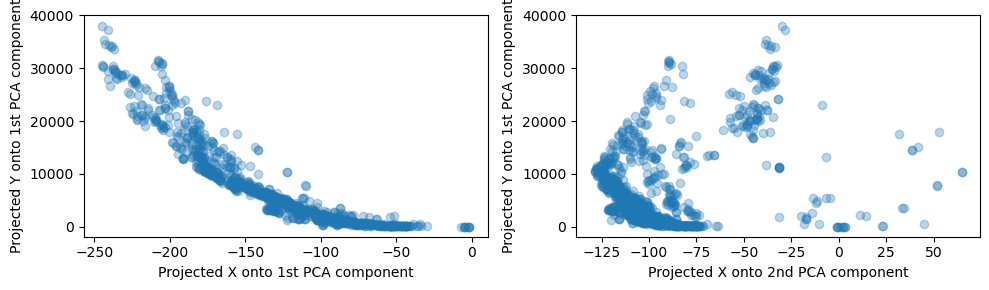

In [124]:
y = Y.dot(y_pca.components_[0])
x0 = X.dot(x_pca.components_[0])
x1 = X.dot(x_pca.components_[1])

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(x0, y, alpha=0.3)
axes[0].set(xlabel="Projected X onto 1st PCA component", ylabel="Projected Y onto 1st PCA component")

axes[1].scatter(x1, y, alpha=0.3)
axes[1].set(xlabel="Projected X onto 2nd PCA component", ylabel="Projected Y onto 1st PCA component")

plt.tight_layout()
plt.show()

In [125]:
# Alternative way to extract the 1st PCA component,
# the other being the dot product performed earlier.
y_pca.transform(Y).T[0].shape

(1000,)

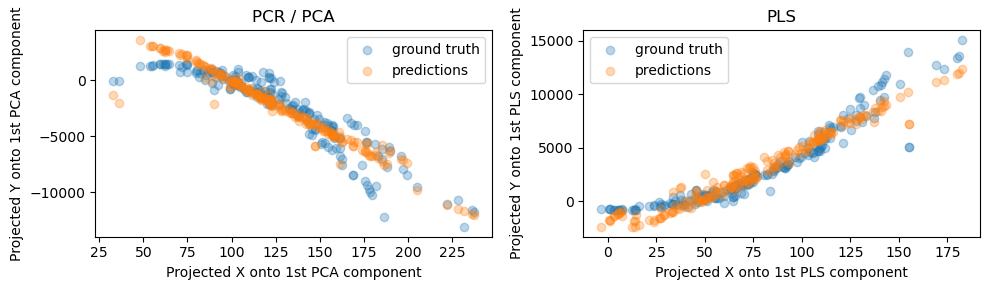

In [126]:
n = 5

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=rng)

pcr = make_pipeline(StandardScaler(), PCA(n_components=n), LinearRegression())
pcr.fit(X_train, Y_train)
pca_step = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

y_pca = make_pipeline(StandardScaler(), PCA())
y_pca.fit(Y_train)
y_pca_step = y_pca.named_steps["pca"]

pls = make_pipeline(StandardScaler(), PLSRegression(n_components=n))
pls.fit(X_train, Y_train)
pls_step = pls.named_steps["plsregression"]

x_test_pca = X_test.dot(pca_step.components_[0])
y_test_pca = Y_test.dot(y_pca_step.components_[0])
Y_pred_pca = pcr.predict(X_test)
y_pred_pca = Y_pred_pca.dot(y_pca_step.components_[0])

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(x_test_pca, y_test_pca, alpha=0.3,
                label="ground truth")
axes[0].scatter(x_test_pca, y_pred_pca, alpha=0.3,
                label="predictions")
axes[0].set(
    xlabel="Projected X onto 1st PCA component",
    ylabel="Projected Y onto 1st PCA component",
    title="PCR / PCA"
)
axes[0].legend()

x_test_pls = X_test.dot(pls_step.x_weights_.T[0])
y_test_pls = Y_test.dot(pls_step.y_weights_.T[0])
Y_pred_pls = pls.predict(X_test)
y_pred_pls = Y_pred_pls.dot(pls_step.y_weights_.T[0])

axes[1].scatter(x_test_pls, y_test_pls, alpha=0.3,
                label="ground truth")
axes[1].scatter(x_test_pls, y_pred_pls, alpha=0.3,
                label="predictions")
axes[1].set(xlabel="Projected X onto 1st PLS component",
            ylabel="Projected Y onto 1st PLS component",
            title="PLS")
axes[1].legend()

plt.tight_layout()
plt.show()

In [127]:
print(f"PCR r-squared {pcr.score(X_train, Y_train):.3f}")
print(f"PLS r-squared {pls.score(X_train, Y_train):.3f}")

PCR r-squared 0.729
PLS r-squared 0.790


In [128]:
print(f"PCR r-squared {pcr.score(X_test, Y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, Y_test):.3f}")

# (approximate values, vary on refresh due to train_test_split())
# 1 component:
# PCR r-squared 0.385
# PLS r-squared 0.532

# 2 components:
# PCR r-squared 0.432
# PLS r-squared 0.660

# 3 components:
# PCR r-squared 0.540
# PLS r-squared 0.750

# 4 components:
# PCR r-squared 0.605
# PLS r-squared 0.769

# 5 components (PLS's max):
# PCR r-squared 0.718
# PLS r-squared 0.783

# 6 components?
# It will only throw an error if using PLSCanonical, not
# PLSRegression.
# PCR r-squared 0.759
# PLS r-squared 0.809


PCR r-squared 0.701
PLS r-squared 0.772


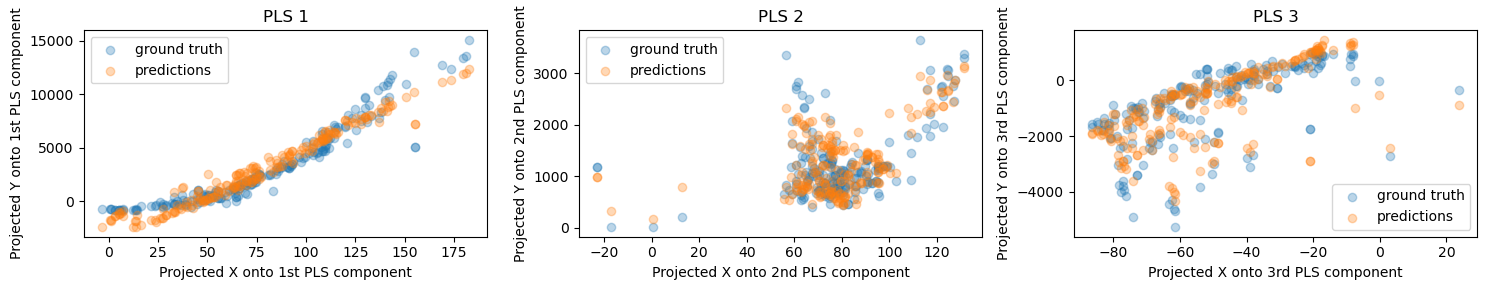

In [129]:
x_test_pls0 = x_test_pls
x_test_pls1 = X_test.dot(pls_step.x_weights_.T[1])
x_test_pls2 = X_test.dot(pls_step.x_weights_.T[2])
x_test_pls3 = X_test.dot(pls_step.x_weights_.T[3])
x_test_pls4 = X_test.dot(pls_step.x_weights_.T[4])

y_test_pls0 = y_test_pls
y_test_pls1 = Y_test.dot(pls_step.y_weights_.T[1])
y_test_pls2 = Y_test.dot(pls_step.y_weights_.T[2])
y_test_pls3 = Y_test.dot(pls_step.y_weights_.T[3])
y_test_pls4 = Y_test.dot(pls_step.y_weights_.T[4])

y_pred_pls0 = y_pred_pls
y_pred_pls1 = Y_pred_pls.dot(pls_step.y_weights_.T[1])
y_pred_pls2 = Y_pred_pls.dot(pls_step.y_weights_.T[2])
y_pred_pls3 = Y_pred_pls.dot(pls_step.y_weights_.T[3])
y_pred_pls4 = Y_pred_pls.dot(pls_step.y_weights_.T[4])

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
axes[0].scatter(x_test_pls0, y_test_pls0, alpha=0.3,
                label="ground truth")
axes[0].scatter(x_test_pls0, y_pred_pls0, alpha=0.3,
                label="predictions")
axes[0].set(xlabel="Projected X onto 1st PLS component",
            ylabel="Projected Y onto 1st PLS component",
            title="PLS 1")
axes[0].legend()

axes[1].scatter(x_test_pls1, y_test_pls1, alpha=0.3,
                label="ground truth")
axes[1].scatter(x_test_pls1, y_pred_pls1, alpha=0.3,
                label="predictions")
axes[1].set(xlabel="Projected X onto 2nd PLS component",
            ylabel="Projected Y onto 2nd PLS component",
            title="PLS 2")
axes[1].legend()

axes[2].scatter(x_test_pls2, y_test_pls2, alpha=0.3,
                label="ground truth")
axes[2].scatter(x_test_pls2, y_pred_pls2, alpha=0.3,
                label="predictions")
axes[2].set(xlabel="Projected X onto 3rd PLS component",
            ylabel="Projected Y onto 3rd PLS component",
            title="PLS 3")
axes[2].legend()

plt.tight_layout()
plt.show()

In [130]:
r2_score(y_test_pls0, y_pred_pls0)


0.9115653020729042

In [131]:
y_test_pls01 = Y_test.dot(pls_step.y_weights_.T[:2].T)
y_pred_pls01 = Y_pred_pls.dot(pls_step.y_weights_.T[:2].T)

y_test_pls02 = Y_test.dot(pls_step.y_weights_.T[:3].T)
y_pred_pls02 = Y_pred_pls.dot(pls_step.y_weights_.T[:3].T)

y_test_pls03 = Y_test.dot(pls_step.y_weights_.T[:-1].T)
y_pred_pls03 = Y_pred_pls.dot(pls_step.y_weights_.T[:-1].T)

y_test_pls04 = Y_test.dot(pls_step.y_weights_)
y_pred_pls04 = Y_pred_pls.dot(pls_step.y_weights_)

r2_score(y_test_pls01, y_pred_pls01), \
r2_score(y_test_pls02, y_pred_pls02), \
r2_score(y_test_pls03, y_pred_pls03), \
r2_score(y_test_pls04, y_pred_pls04)

(0.8469257597689774,
 0.8698011051139423,
 0.8790079404570641,
 0.8803255768918017)

In [132]:
Y_train_pred = pls.predict(X_train)

r2_score(Y_train.dot(pls_step.y_weights_.T[0]), Y_train_pred.dot(pls_step.y_weights_.T[0]))


0.9180129146607918